In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
dfx = pd.read_csv("D:/weightedX.csv")
dfy = pd.read_csv("D:/weightedY.csv")

In [3]:
X = dfx.values
y = dfy.values

In [5]:
print(X.shape)
print(y.shape)

(99, 1)
(99, 1)


In [7]:
# Normalize 
u = X.mean()
std = X.std()
X = (X-u)/std

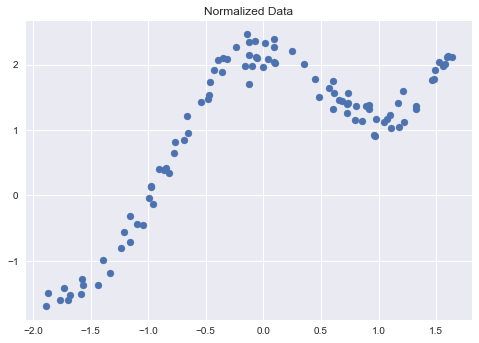

In [11]:
plt.style.use("seaborn")
plt.title("Normalized Data")
plt.scatter(X,y)
plt.show()

In [12]:
def getW(query_point,X,tau):
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x = query_point
        W[i,i] = np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

In [21]:
X = np.mat(X)
Y = np.mat(y)
M = X.shape[0]
W = getW(-1,X,100)
print(W)

[[0.99997933 0.         0.         ... 0.         0.         0.        ]
 [0.         0.99999834 0.         ... 0.         0.         0.        ]
 [0.         0.         0.99997917 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.99994881 0.         0.        ]
 [0.         0.         0.         ... 0.         0.99987121 0.        ]
 [0.         0.         0.         ... 0.         0.         0.99975348]]


In [25]:
# Predictions 

def predict(X,Y,query_x,tau):
    ones = np.ones((M,1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    pred = np.dot(qx,theta)
    
    return pred,theta

In [26]:
pred,theta = predict(X,Y,1.0,1.0)

In [27]:
print(theta)

[[0.14069504]
 [1.45348191]]


In [28]:
print(pred)

[[1.59417694]]


In [33]:
def plotPrediction(tau):
    X_test = np.linspace(-2,2,10)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(X,Y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(X)
    YO = np.array(Y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color='red')
    plt.show()

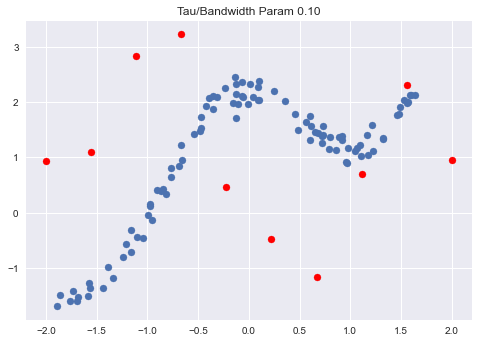

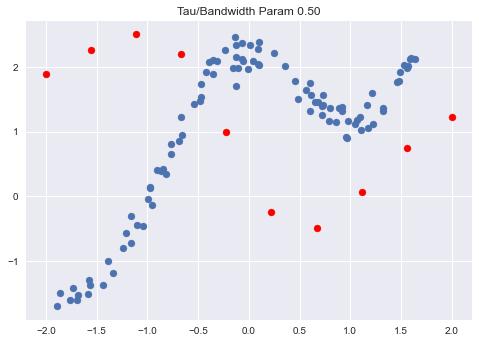

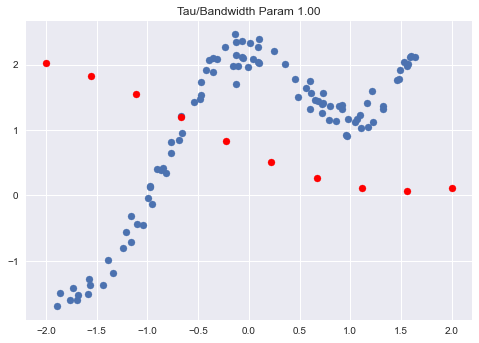

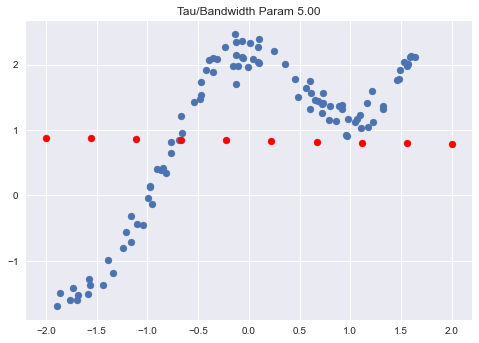

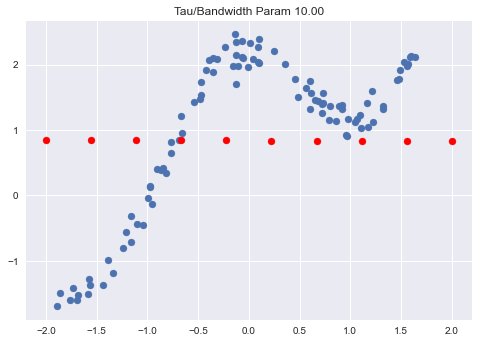

In [34]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)